In [46]:
#import all the necessary modules into the workspace
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [16]:
all_data = pd.read_csv('all_data.csv')
print(all_data.head())
all_data.fillna(0)
print(all_data.info())
all_data.rename(columns={"Life expectancy at birth (years)": "life_expectancy"}, inplace = True)
print(all_data)
# Based on this initial assessment of the data, it appears if there are no missing data points.

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
     Country  Year  life_expectancy           GDP
0      Chile  2000 

The first aspect I noticed that there are multiple data points for a country. Based on this, I can look at how many unique countries there are, determine the trajectory of each country, and if there are only a handful of coutnries, I would put it on one map and look at how one country changes depending on another.

In [17]:
# Looking at the number of unique countries
countries = all_data["Country"].unique()
# Grouping each country into its own variable
countries_data = {}
for country in countries:
    countries_data[country] = all_data[all_data["Country"] == country]
print(countries_data)

{'Chile':    Country  Year  life_expectancy           GDP
0    Chile  2000             77.3  7.786093e+10
1    Chile  2001             77.3  7.097992e+10
2    Chile  2002             77.8  6.973681e+10
3    Chile  2003             77.9  7.564346e+10
4    Chile  2004             78.0  9.921039e+10
5    Chile  2005             78.4  1.229650e+11
6    Chile  2006             78.9  1.547880e+11
7    Chile  2007             78.9  1.736060e+11
8    Chile  2008             79.6  1.796380e+11
9    Chile  2009             79.3  1.723890e+11
10   Chile  2010             79.1  2.185380e+11
11   Chile  2011             79.8  2.522520e+11
12   Chile  2012             79.9  2.671220e+11
13   Chile  2013             80.1  2.783840e+11
14   Chile  2014             80.3  2.609900e+11
15   Chile  2015             80.5  2.425180e+11, 'China':    Country  Year  life_expectancy           GDP
16   China  2000             71.7  1.211350e+12
17   China  2001             72.2  1.339400e+12
18   China  2002    

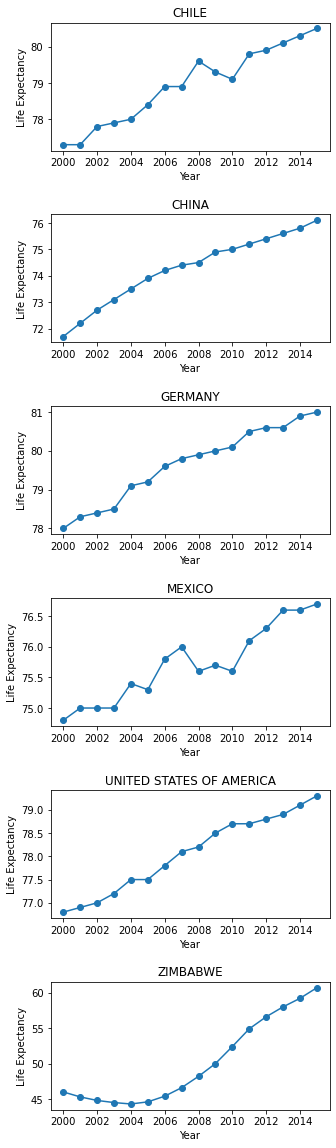

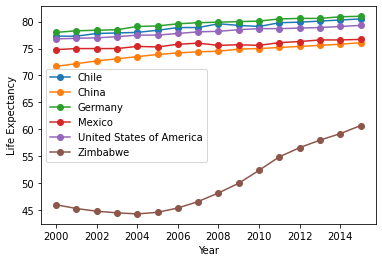

<Figure size 432x288 with 0 Axes>

In [18]:
# Obtaining the summary for each of the country for life expectancy
plt.figure(figsize = (5, 20))
plt.subplots_adjust(hspace = 0.5)
for n, country in enumerate(countries_data):
    ax = plt.subplot(len(countries_data), 1, n + 1)
    year = countries_data[country]["Year"]
    life_expectancy = countries_data[country]["life_expectancy"]
    plt.plot(year, life_expectancy, marker = "o")
    ax.set_title(country.upper())
    ax.set_xlabel("Year")
    ax.set_ylabel("Life Expectancy")
plt.show()
plt.clf
# Now to plot all of the data on one graph
for country in countries_data:
    ax = plt.subplot()
    year = countries_data[country]["Year"]
    life_expectancy = countries_data[country]["life_expectancy"]
    plt.plot(year, life_expectancy, marker = "o")
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
plt.legend(countries_data.keys())
plt.show()
plt.clf()

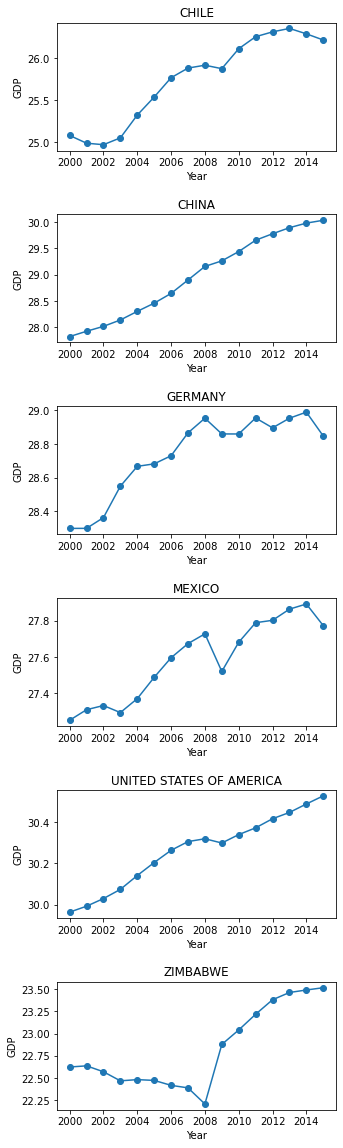

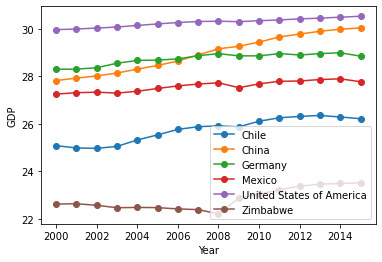

<Figure size 432x288 with 0 Axes>

In [19]:
#The next item that we can look at is the GDP. Since the GDP has large values, it is a good idea to transform the values with log.
# Obtaining the summary for each of the country
plt.figure(figsize = (5, 20))
plt.subplots_adjust(hspace = 0.5)
for n, country in enumerate(countries_data):
    ax = plt.subplot(len(countries_data), 1, n + 1)
    year = countries_data[country]["Year"]
    life_expectancy = np.log(countries_data[country]["GDP"])
    plt.plot(year, life_expectancy, marker = "o")
    ax.set_title(country.upper())
    ax.set_xlabel("Year")
    ax.set_ylabel("GDP")
plt.show()
plt.clf
# Now to plot all of the data on one graph
for country in countries_data:
    ax = plt.subplot()
    year = countries_data[country]["Year"]
    life_expectancy = np.log(countries_data[country]["GDP"])
    plt.plot(year, life_expectancy, marker = "o")
ax.set_xlabel("Year")
ax.set_ylabel("GDP")
plt.legend(countries_data.keys())
plt.show()
plt.clf()
    

After looking at the data, there are some correlation analysis that can be completed to see if certain aspects are correlated with one another.

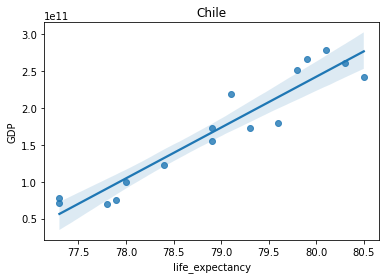

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.87e-08
Time:                        16:03:13   Log-Likelihood:                -404.63
No. Observations:                  16   AIC:                             813.3
Df Residuals:                      14   BIC:                             814.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.274e+12   4.79e+11    -

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


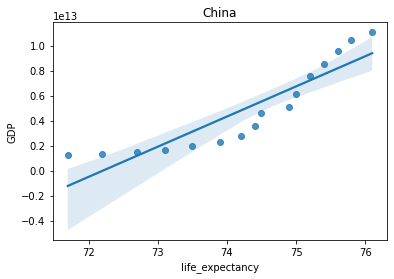

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     66.19
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.13e-06
Time:                        16:03:14   Log-Likelihood:                -470.37
No. Observations:                  16   AIC:                             944.7
Df Residuals:                      14   BIC:                             946.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.743e+14    2.2e+13     

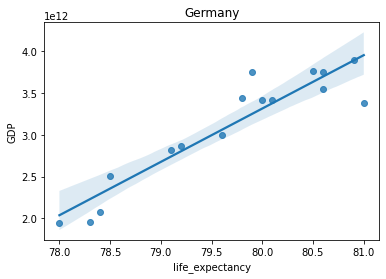

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     93.63
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.40e-07
Time:                        16:03:14   Log-Likelihood:                -441.50
No. Observations:                  16   AIC:                             887.0
Df Residuals:                      14   BIC:                             888.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.777e+13   5.26e+12     

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


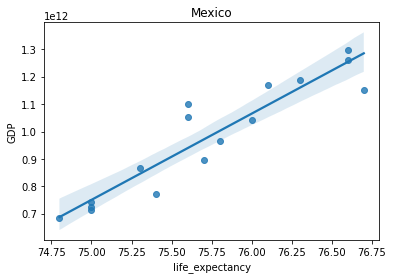

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     92.93
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.47e-07
Time:                        16:03:14   Log-Likelihood:                -423.02
No. Observations:                  16   AIC:                             850.0
Df Residuals:                      14   BIC:                             851.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.285e+13   2.47e+12     

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


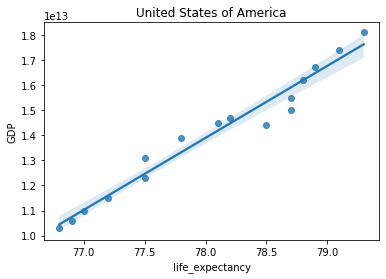

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     372.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.75e-11
Time:                        16:03:14   Log-Likelihood:                -451.97
No. Observations:                  16   AIC:                             907.9
Df Residuals:                      14   BIC:                             909.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.098e+14   1.16e+13    -

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


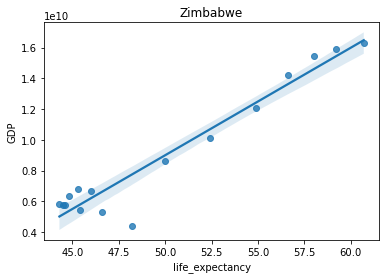

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     196.7
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.24e-09
Time:                        16:03:14   Log-Likelihood:                -355.40
No. Observations:                  16   AIC:                             714.8
Df Residuals:                      14   BIC:                             716.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.596e+10   2.51e+09    -

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Figure size 432x288 with 0 Axes>

In [57]:
# We can search for the correlation between if the life expectancy has an effect on the GDP. Since these are two quantitative
# variables, we can complete a t-test.
for country in countries:
    life_expectancy = countries_data[country]['life_expectancy']
    gdp = countries_data[country]['GDP']
    ax = sns.regplot(x=life_expectancy, y=gdp, fit_reg=True)
    plt.title(country)
    plt.show()
    plt.clf()
    x = sm.add_constant(life_expectancy) # adding a constant
    lm = sm.OLS(gdp,x).fit() # fitting the model
    print(lm.summary())

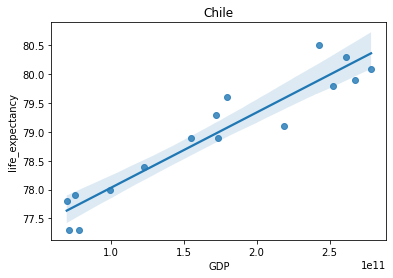

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.87e-08
Time:                        16:07:43   Log-Likelihood:                -4.4985
No. Observations:                  16   AIC:                             13.00
Df Residuals:                      14   BIC:                             14.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.7223      0.213    359.604      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


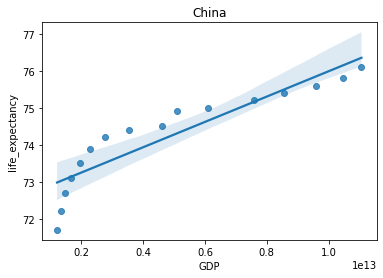

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     66.19
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.13e-06
Time:                        16:07:43   Log-Likelihood:                -12.642
No. Observations:                  16   AIC:                             29.28
Df Residuals:                      14   BIC:                             30.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5669      0.252    287.416      0.0

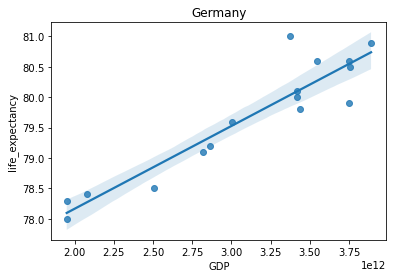

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     93.63
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.40e-07
Time:                        16:07:43   Log-Likelihood:                -5.4643
No. Observations:                  16   AIC:                             14.93
Df Residuals:                      14   BIC:                             16.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.4399      0.445    169.477      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


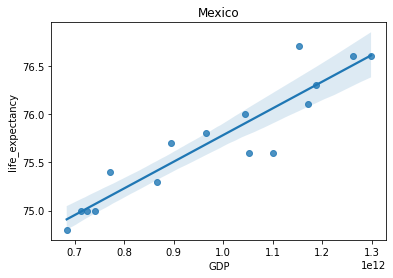

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     92.93
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.47e-07
Time:                        16:07:44   Log-Likelihood:                 1.7010
No. Observations:                  16   AIC:                            0.5980
Df Residuals:                      14   BIC:                             2.143
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.0209      0.286    255.459      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


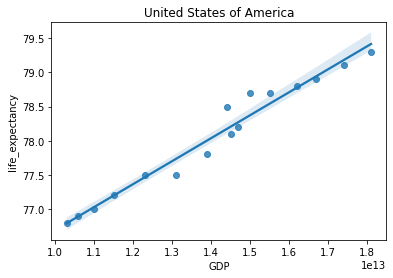

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     372.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.75e-11
Time:                        16:07:44   Log-Likelihood:                 7.2844
No. Observations:                  16   AIC:                            -10.57
Df Residuals:                      14   BIC:                            -9.024
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.3336      0.249    295.089      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


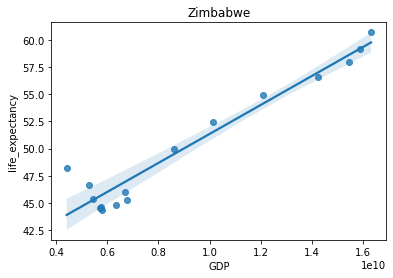

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     196.7
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.24e-09
Time:                        16:07:44   Log-Likelihood:                -29.005
No. Observations:                  16   AIC:                             62.01
Df Residuals:                      14   BIC:                             63.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9925      0.950     40.010      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Figure size 432x288 with 0 Axes>

In [58]:
for country in countries:
    life_expectancy = countries_data[country]['life_expectancy']
    gdp = countries_data[country]['GDP']
    ax = sns.regplot(x=gdp, y=life_expectancy, fit_reg=True)
    plt.title(country)
    plt.show()
    plt.clf()
    x = sm.add_constant(gdp) # adding a constant
    lm = sm.OLS(life_expectancy,x).fit() # fitting the model
    print(lm.summary())

The slope is 1.553883e+10


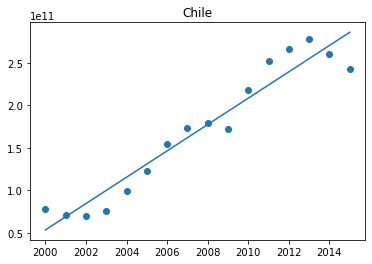

The slope is 7.129090e+11


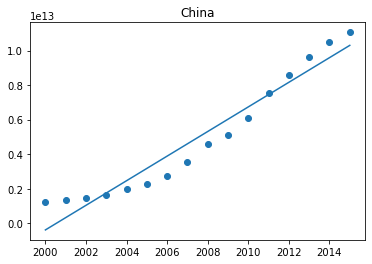

The slope is 1.253858e+11


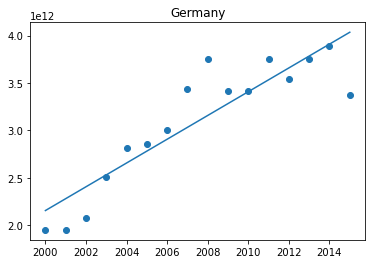

The slope is 4.124950e+10


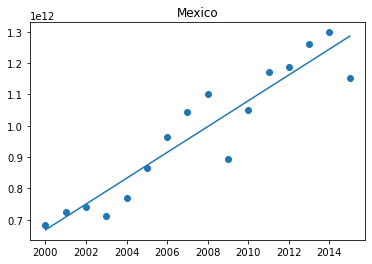

The slope is 5.058824e+11


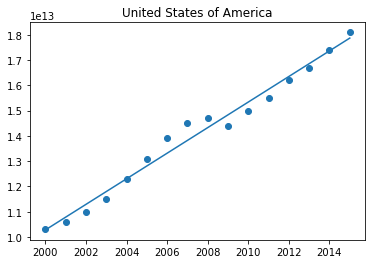

The slope is 7.561449e+08


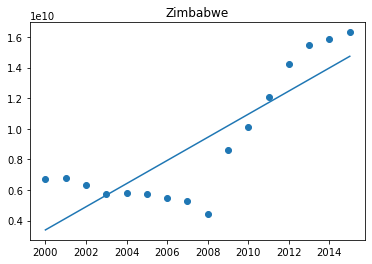

<Figure size 432x288 with 0 Axes>

In [56]:
# We can look at which country had the most growth in the past 15 years. This would involve plotting every country as a scatter
# plot and then checking the best fit line.
#find line of best fit
for country in countries:
    x = countries_data[country]['Year']
    y = countries_data[country]['GDP']
    a, b = np.polyfit(x, y, 1)
    print("The slope is " + "{:e}".format(a))
    plt.scatter(x, y)
    plt.plot(x, a*x+b)
    plt.title(country)
    plt.show()
    plt.clf()